# EDA of Sandeep Maheshwari's Youtube Channel Data

1. Link to the YT Channel - https://www.youtube.com/@SandeepSeminars

2. Link to the Dataset (extracted using YT API) - https://www.kaggle.com/datasets/rohitudageri/sandeep-mashewari-youtube-channel

# Importing DataSet

In [7]:
import numpy as np
import pandas as pd
df = pd.read_csv("/kaggle/input/sandeep-mashewari-youtube-channel/SandeepMaheshwari_Youtube_Channel_Stats.csv")

In [8]:
df.head(2)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,JblNzdZ_7pw,Sandeep Maheshwari,The Future of Technology Ft. Anshuman Singh | ...,Sandeep Maheshwari is a name among millions wh...,"['Tech', 'Technology', 'Ai', 'Ml', 'Machine le...",2023-08-05T10:13:19Z,504830,29124,0,1917,PT20M32S,hd,False
1,YnSOzCKs7Pw,Sandeep Maheshwari,Biggest Parenting Mistake | Sandeep Maheshwari...,Sandeep Maheshwari is a name among millions wh...,"['Parent', 'Parents', 'Parenting', 'Career', '...",2023-08-03T09:05:51Z,762563,48387,0,3122,PT13M40S,hd,False


# Data Pre-Processing

In [9]:
df.shape

(589, 13)

In [10]:
df.size

7657

In [11]:
df.isna().sum()

video_id         0
channelTitle     0
title            0
description      4
tags             0
publishedAt      0
viewCount        0
likeCount        0
favoriteCount    0
commentCount     0
duration         0
definition       0
caption          0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df['publishedAt'].dtype

dtype('O')

In [14]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['publishedAt'].dtype

datetime64[ns, UTC]

In [15]:
df['publish_date'] = df['publishedAt'].dt.date

In [16]:
df['publish_time'] = df['publishedAt'].dt.time

In [17]:
df['publish_year'] = df['publishedAt'].dt.year

In [18]:
df['publish_day'] = df['publishedAt'].dt.day_name()

In [19]:
df[['publish_date','publish_time','publish_year','publish_day']].head()

,publish_date,publish_time,publish_year,publish_day
0,2023-08-05,10:13:19,2023,Saturday
1,2023-08-03,09:05:51,2023,Thursday
2,2023-07-26,10:20:29,2023,Wednesday
3,2023-07-19,14:30:08,2023,Wednesday
4,2023-07-17,11:06:01,2023,Monday


In [20]:
df['duration'].dtype

dtype('O')

# EDA

In [21]:
top_5= df[['title','viewCount']].sort_values('viewCount',ascending = False).set_index(np.arange(1,(df.shape[0] +1))).head(5)
# top_5 = df[["title","viewCount"]].sort_values("viewCount", ascending = False).head(5)
top_5

,title,viewCount
1,World's Most Viewed Life Changing Video By San...,67353869
2,Make Money From Money - By Sandeep Maheshwari ...,51519779
3,MORNING MOTIVATIONAL VIDEO - Sandeep Maheshwar...,39037203
4,Speak English with Confidence - By Sandeep Mah...,36069549
5,Akele Khush Rehna Seekho - By Sandeep Maheshwari,25769772


([0, 1, 2, 3, 4],
 [Text(0, 0, "World's Most Viewed Life Changing Video By Sandeep Maheshwari | Hindi"),
  Text(1, 0, 'Make Money From Money - By Sandeep Maheshwari | Hindi'),
  Text(2, 0, 'MORNING MOTIVATIONAL VIDEO - Sandeep Maheshwari | DAILY MORNING AFFIRMATIONS Hindi'),
  Text(3, 0, 'Speak English with Confidence - By Sandeep Maheshwari | Hindi'),
  Text(4, 0, 'Akele Khush Rehna Seekho - By Sandeep Maheshwari')])

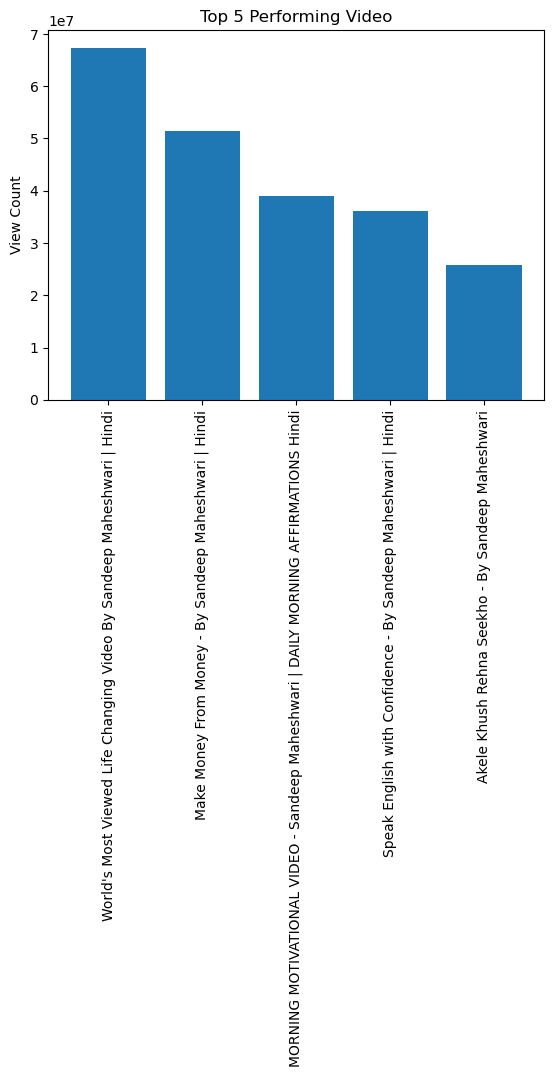

In [22]:
import matplotlib.pyplot as plt
plt.bar(top_5['title'],top_5['viewCount'])
# plt.xlabel("Video Title")
plt.ylabel("View Count")
plt.title("Top 5 Performing Video")
plt.xticks(rotation = 90)

In [23]:
bottom_5 = df[['title','viewCount']].sort_values('viewCount').set_index(np.arange(1,(df.shape[0]+1))).head()
bottom_5

,title,viewCount
1,PROMO: POWER OF BELIEF by Sandeep Maheshwari,281545
2,Meet Ritika Mehra & Vishal Mehra Stylox Founde...,293615
3,Meet DIETOFY Founders | Episode 85,305168
4,Meet Sumeet Mehta LEAD Founder | Episode 95,389650
5,Meet Akhil Gupta & Amit Agarwal With Sandeep M...,424320


([0, 1, 2, 3, 4],
 [Text(0, 0, 'PROMO: POWER OF BELIEF by Sandeep Maheshwari'),
  Text(1, 0, 'Meet Ritika Mehra & Vishal Mehra Stylox Founders | Episode 83'),
  Text(2, 0, 'Meet DIETOFY Founders | Episode 85'),
  Text(3, 0, 'Meet Sumeet Mehta LEAD Founder | Episode 95'),
  Text(4, 0, 'Meet Akhil Gupta & Amit Agarwal With Sandeep Maheshwari | Episode 106 | Business & Startup Tips')])

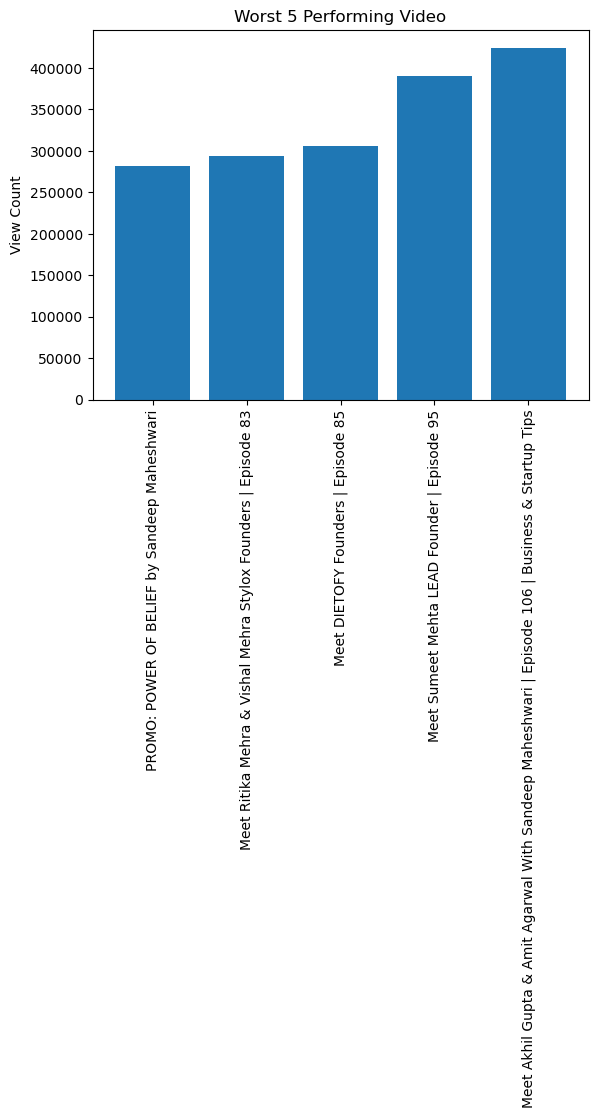

In [24]:
plt.bar(bottom_5['title'],bottom_5['viewCount'])
plt.ylabel("View Count")
plt.title("Worst 5 Performing Video")
plt.xticks(rotation = 90)

# Using NLP (NLTK)

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [27]:
df["title_no_stopwords"] = df["title"].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
df.title_no_stopwords

0      Future Technology Ft. Anshuman Singh | Sandeep...
1      Biggest Parenting Mistake | Sandeep Maheshwari...
2      Mahabharat Ft. Ami Ganatra | Sandeep Maheshwar...
3      Real History India Ft. Abhijit Chavda | Sandee...
4      Artificial Intelligence Ft. Divij Bajaj | Sand...
                             ...                        
584    Sandeep Maheshwari - Motivational Video Powerf...
585    Sandeep Maheshwari's Inspirational Talk IIT Ka...
586    LAST Life Changing Seminar - Sandeep Maheshwar...
587    World's Viewed Life Changing Video Sandeep Mah...
588    FIRST Life Changing Seminar - Sandeep Maheshwa...
Name: title_no_stopwords, Length: 589, dtype: object

Creating a Word Cloud

In [48]:
all_words_str = ' '.join(df["title_no_stopwords"].tolist())

In [50]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000, height=2000, random_state=1, collocations=False).generate(all_words_str)
wordcloud

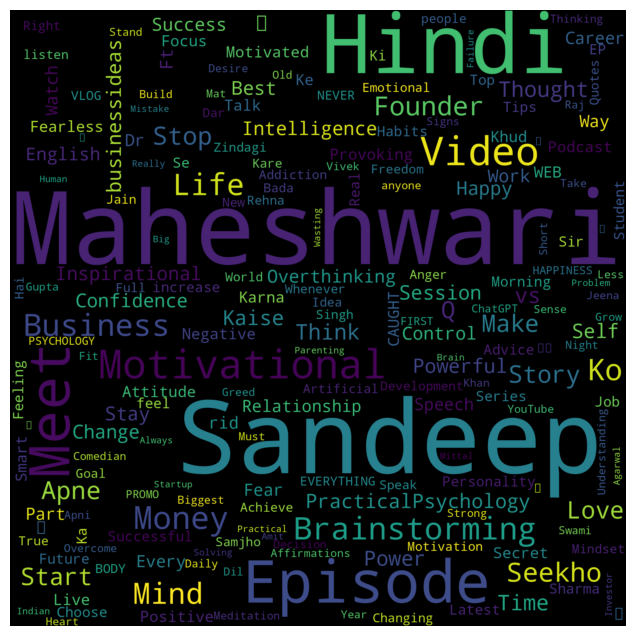

In [51]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_cloud(wordcloud)

# Video Stats Analysis

In [28]:
day_count = df['publish_day'].value_counts()
day_count

Wednesday    148
Thursday     119
Saturday      88
Friday        82
Tuesday       78
Monday        70
Sunday         4
Name: publish_day, dtype: int64

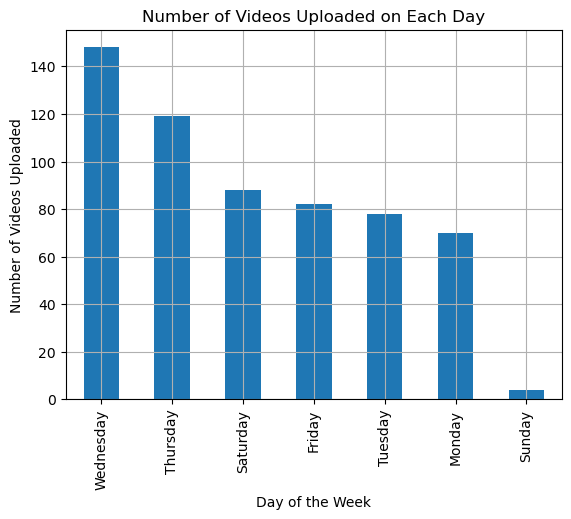

In [29]:
day_count.plot(kind='bar')

plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos Uploaded')
plt.title('Number of Videos Uploaded on Each Day')
# plt.xticks(rotation=0)

plt.grid()
plt.show()

Conclusions:

1. The highest number of video uploads occurred on Wednesday, totaling 148 videos.
2. Sunday witnessed the lowest number of video uploads

In [30]:
year_metrics = df.groupby('publish_year').agg(
                number_of_videos=('publishedAt', 'size'),
                avg_view=('viewCount', 'mean'),
                avg_like=('likeCount', 'mean'),
                avg_comment=('commentCount', 'mean')
                ).reset_index()
year_metrics

,publish_year,number_of_videos,avg_view,avg_like,avg_comment
0,2012,2,3.760763e+07,570105.000000,26145.500000
1,2013,10,4.020106e+06,102139.400000,3569.200000
2,2014,5,4.540274e+06,103272.600000,3744.000000
3,2015,17,4.811741e+06,126729.352941,4143.941176
4,2016,29,5.457973e+06,145242.793103,3944.275862
5,2017,70,3.742708e+06,119190.114286,3706.742857
6,2018,49,6.033629e+06,227972.897959,7606.551020
7,2019,51,7.235250e+06,282386.921569,9210.686275
8,2020,86,4.216299e+06,215511.383721,8818.267442
9,2021,105,1.617589e+06,80118.990476,4153.457143


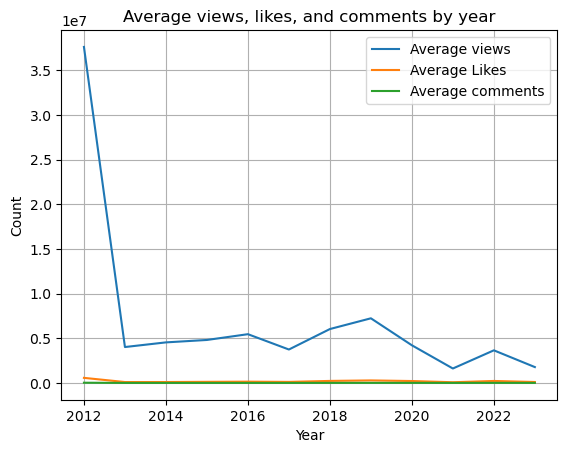

In [31]:
plt.plot(year_metrics["publish_year"] , year_metrics["avg_view"]  , label = "Average views")
plt.plot(year_metrics["publish_year"] , year_metrics["avg_like"], label = "Average Likes")
plt.plot(year_metrics["publish_year"] , year_metrics["avg_comment"], label = "Average comments")

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Average views, likes, and comments by year')

plt.legend()
plt.grid()
plt.show()

In [32]:
df.head(2)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption,publish_date,publish_time,publish_year,publish_day,title_no_stopwords
0,JblNzdZ_7pw,Sandeep Maheshwari,The Future of Technology Ft. Anshuman Singh | ...,Sandeep Maheshwari is a name among millions wh...,"['Tech', 'Technology', 'Ai', 'Ml', 'Machine le...",2023-08-05 10:13:19+00:00,504830,29124,0,1917,PT20M32S,hd,False,2023-08-05,10:13:19,2023,Saturday,Future Technology Ft. Anshuman Singh | Sandeep...
1,YnSOzCKs7Pw,Sandeep Maheshwari,Biggest Parenting Mistake | Sandeep Maheshwari...,Sandeep Maheshwari is a name among millions wh...,"['Parent', 'Parents', 'Parenting', 'Career', '...",2023-08-03 09:05:51+00:00,762563,48387,0,3122,PT13M40S,hd,False,2023-08-03,09:05:51,2023,Thursday,Biggest Parenting Mistake | Sandeep Maheshwari...


In [33]:
def time_analyze(publish_time):
    if (0< publish_time.hour < 12):
        return 'Morning'
    if (12 <= publish_time.hour < 17 ):
        return 'Afternoon'
    if (17 <= publish_time.hour < 20):
        return 'Evening'
    if (17 <= publish_time.hour <= 24):
        return 'Night'

In [34]:
df['time_slot'] = df['publish_time'].apply(time_analyze)
df.head(2)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption,publish_date,publish_time,publish_year,publish_day,title_no_stopwords,time_slot
0,JblNzdZ_7pw,Sandeep Maheshwari,The Future of Technology Ft. Anshuman Singh | ...,Sandeep Maheshwari is a name among millions wh...,"['Tech', 'Technology', 'Ai', 'Ml', 'Machine le...",2023-08-05 10:13:19+00:00,504830,29124,0,1917,PT20M32S,hd,False,2023-08-05,10:13:19,2023,Saturday,Future Technology Ft. Anshuman Singh | Sandeep...,Morning
1,YnSOzCKs7Pw,Sandeep Maheshwari,Biggest Parenting Mistake | Sandeep Maheshwari...,Sandeep Maheshwari is a name among millions wh...,"['Parent', 'Parents', 'Parenting', 'Career', '...",2023-08-03 09:05:51+00:00,762563,48387,0,3122,PT13M40S,hd,False,2023-08-03,09:05:51,2023,Thursday,Biggest Parenting Mistake | Sandeep Maheshwari...,Morning


In [35]:
day_matrics = df.groupby('publish_day').agg(time = ('time_slot','size'))
day_matrics

,time
publish_day,
Friday,82
Monday,70
Saturday,88
Sunday,4
Thursday,119
Tuesday,78
Wednesday,148


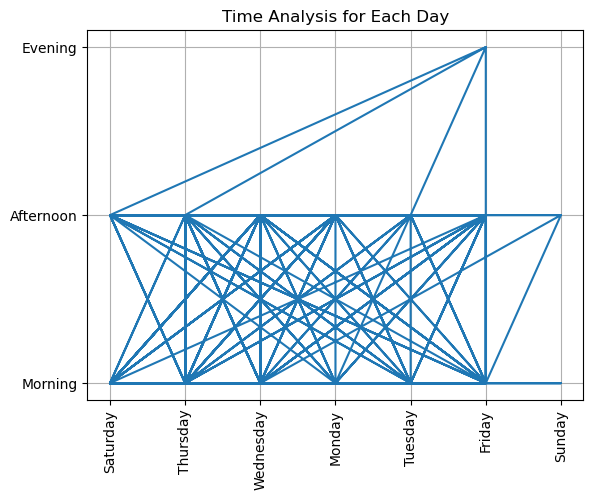

In [36]:
plt.plot(df["publish_day"] , df["time_slot"])
plt.title('Time Analysis for Each Day')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In [37]:
time_slot_counts = df['time_slot'].value_counts()
time_slot_counts

Morning      455
Afternoon    132
Evening        2
Name: time_slot, dtype: int64

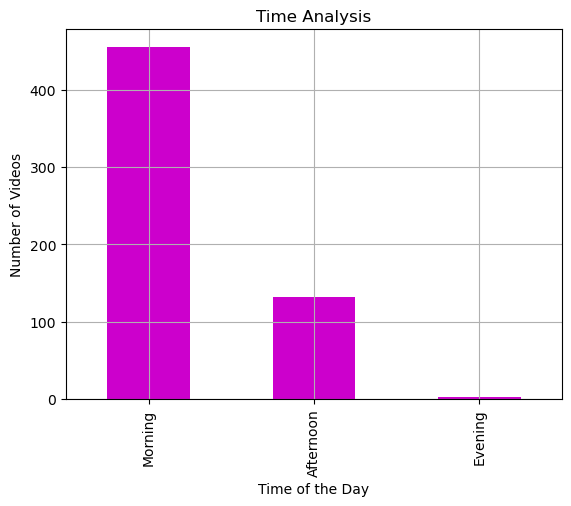

In [38]:
time_slot_counts.plot(kind = 'bar', color = '#cc00cc')
plt.title('Time Analysis')
plt.ylabel("Number of Videos")
plt.xlabel("Time of the Day")
plt.grid()
plt.show()

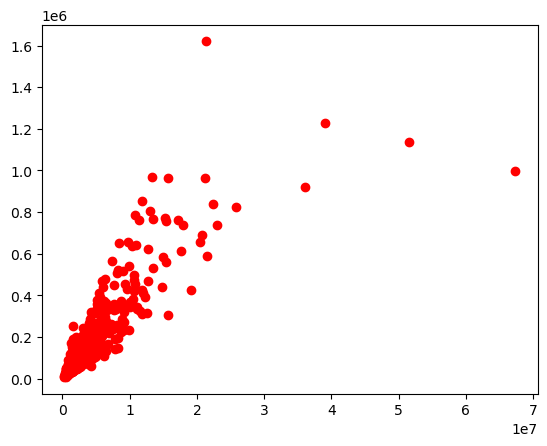

In [39]:
plt.scatter(df['viewCount'],df['likeCount'], color= "red")
plt.xlabel = "Views"
plt.ylabel = 'Likes'
plt.title = "Views VS Likes"
plt.grid
plt.show()

In [40]:
print("The Corelation Coefficient is",df['viewCount'].corr(df['likeCount']))

The Corelation Coefficient is 0.8516026052046506


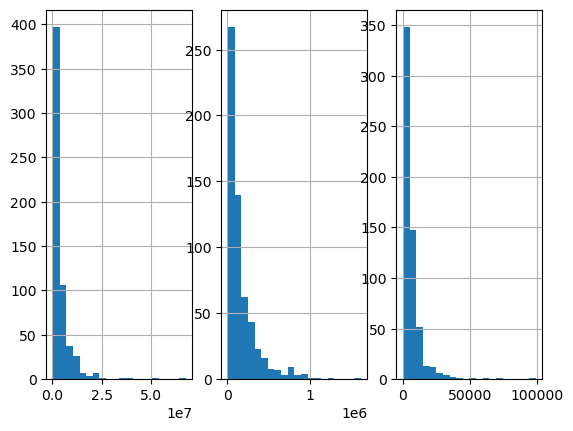

In [41]:
#Plotting histograms for viewCount, likeCount, and commentCount using subplots

plt.subplot(1, 3, 1)
plt.hist(df['viewCount'], bins=20)
plt.title = "Distribution of View Counts"
plt.grid()

plt.subplot(1, 3, 2)
plt.hist(df['likeCount'], bins=20)
plt.title = 'Distribution of Like Counts'
plt.grid()

plt.subplot(1, 3, 3)
plt.hist(df['commentCount'], bins=20)
plt.title = 'Distribution of Comment Counts'
plt.grid()

# Channel Stats Analysis

In [42]:
#First Video
df[["title","publishedAt"]].sort_values("publishedAt").head(1)

,title,publishedAt
588,FIRST Life Changing Seminar - By Sandeep Mahes...,2012-05-24 14:27:58+00:00


In [43]:
#Most Viewed
df[['title','viewCount']].sort_values("viewCount",ascending = False).head(1)

,title,viewCount
587,World's Most Viewed Life Changing Video By San...,67353869


In [44]:
#Most Liked
df[['title','likeCount']].sort_values("likeCount",ascending = False).head(1)

,title,likeCount
108,Meet Khan Sir | Episode 29,1620214


In [45]:
#Most Commented
df[['title','commentCount']].sort_values("commentCount",ascending = False).head(1)

,title,commentCount
108,Meet Khan Sir | Episode 29,99053


Thank You :)